# Purpose

In this script we want to numerically check whether the pointwise variance of the predictive distributions is always minimized at the training points. This seems to be the case when the training points are far apart, but when they're close together, the predictive variance at an intermediate point can be lower than the predictive variance at the training points, presumably because the information from the two training points is combined to make a more accurate prediction at the intermediate point.

In [1]:
import os, sys
%pylab inline
plt.style.use("default")

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Define the basis functions
n_feat = 10
mu     = linspace(0, 1, n_feat)
sigma  = 0.1
phi_   = [lambda x, m=mu[i]: exp(-0.5*(x-m)**2/sigma**2) for i in range(n_feat)]

In [3]:
# Generate some data
random.seed(1)
noise_sd = 0.1
n_data = 2
β      = 1/noise_sd**2
#x      = sort(rand(n_data,))
x      = np.array([0.6, 0.62])
t      = sin(2*pi*x) + randn(len(x)) * noise_sd

In [4]:
# Compute the posterior mean and covariance
Phi    = array([phi(x) for phi in phi_]).T
α      = 0.1 # Prior precision
S      = linalg.inv(α * eye(n_feat) + β * Phi.T @ Phi)
m      = β * S @ Phi.T @ t

In [5]:
# Compute the predictive mean at a grid of points
xi    = linspace(0, 1, 1001)
Phi_i = array([phi(xi) for phi in phi_]).T
m_i   = Phi_i @ m
mx_i  = Phi @ m

In [6]:
# Compute the predictive variance at the grid points
v = np.array([p.T @ S @ p for p in Phi_i]) + 1/β
vx= np.array([p.T @ S @ p for p in Phi]) + 1/β

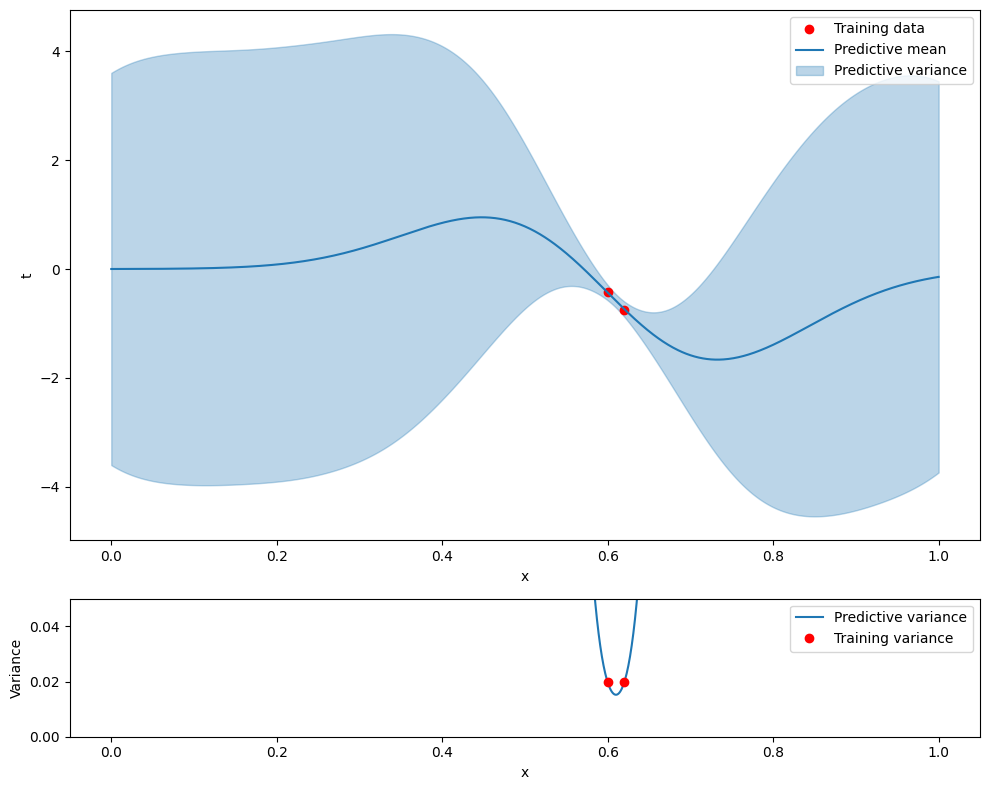

In [7]:
figure(figsize=(10, 8))
subplot(4,1,(1,3))
plot(x, t, 'ro', label = "Training data")
plot(xi, m_i, color = "C0", label = "Predictive mean")
fill_between(xi, m_i - sqrt(v), m_i + sqrt(v), color = "C0", alpha = 0.3, label = "Predictive variance")
xlabel("x")
ylabel("t")
legend()
subplot(4,1,4, sharex = gca())
# Plot the variances
plot(xi, v, label = "Predictive variance")
plot(x, vx, 'ro', label = "Training variance")
ylim(0,0.05)
xlabel("x")
ylabel("Variance")
legend()
tight_layout()

Notice in the last plot that the variance is actually lower at the intermediate point than at the training points. This is presumably because the information from the two training points is combined to make a more accurate prediction at the intermediate point.